<a href="https://colab.research.google.com/github/sanamehrabbeigi/Deep-Learning-Course/blob/main/HW3_starter_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3: تشخیص اعداد دست نویس با استفاده از شبکه‌های عصبی پیچشی (CNN)

*   List item
*   List item


Welcome to Homework 3  &#128522;&#9996;

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


 <div dir='rtl'style="text-align: right;font-family:verdana;">

## A) دسته‌بندی به کمک شبکه‌های عصبی پیچشی
هایپرپارامتر های adam به صورت دیفالت در دستور زیر انتخاب می شود و سپس در شبکه آموزش داده می شود(البته می توان از تنسورفلو تابع adam را صدا زد و به صورت دستی مقداردهی اولیه کرد.) و همچنین تعداد لایه های شبکه را 2 و تعداد نورون های هر لایه را توانی از 2 قراردادیم

In [ ]:
# Define the CNN model
def CNN_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu',padding='same'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10,activation='softmax'),
    ])
    return model


model = CNN_model()
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

 <div dir='rtl'style="text-align: right;font-family:verdana;">

---



در اینجا شبکه آموزش داده شده و نمودار خطا رسم
شده است.

Epoch 1/16
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1913 - accuracy: 0.9418
Epoch 2/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0629 - accuracy: 0.9808
Epoch 3/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0465 - accuracy: 0.9858
Epoch 4/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0376 - accuracy: 0.9886
Epoch 5/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0310 - accuracy: 0.9901
Epoch 6/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0268 - accuracy: 0.9914
Epoch 7/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0223 - accuracy: 0.9930
Epoch 8/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0192 - accuracy: 0.9940
Epoch 9/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0161 - accuracy: 0.9948
Epoch 10/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

Text(0.5, 0, 'epoch')

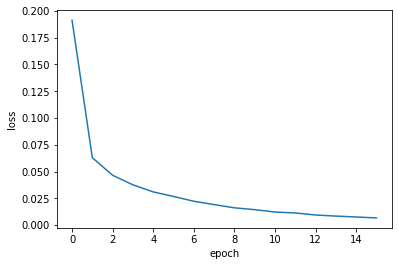

In [ ]:
# Train and test the CNN model
train_Y = tf.keras.utils.to_categorical(train_labels)
cnn_train = model.fit(train_images,train_Y,epochs=16)
plt.plot(cnn_train.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

 <div dir='rtl'style="text-align: right;font-family:verdana;">
سوال اول pdf: بیشتری دقت روی داده های آموزش: 0.9977
دقت روی داده های تست: 0.9896

In [ ]:
#  Use the evaluate method to test the model
test_Y = tf.keras.utils.to_categorical(test_labels)
test_eval = model.evaluate(test_images,test_Y)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0447 - accuracy: 0.9896
Test loss: 0.044678833335638046
Test accuracy: 0.9896000027656555



 <div dir='rtl'style="text-align: right;font-family:verdana;">

**.**

در قسمت زیر می بینیم که کدام یک از شکل ها به درستی تشخیص داده نشده اند و
علت آن این است که این اشکال ناخوانا هستند و از فرم اصلی نیز خارج شده اند و حتی انسان هم ممکن است به آن ها پاسخ غلط دهد.
و اگر دقت کنید به اعدادی که تشخیص داده است در برخی از موارد بسیار نزدیک می باشد و ایراد از شکل و نوع نوشتار است و به هر دو صورت می توان آن عدد را خواند.

(10000, 10) (10000, 10)


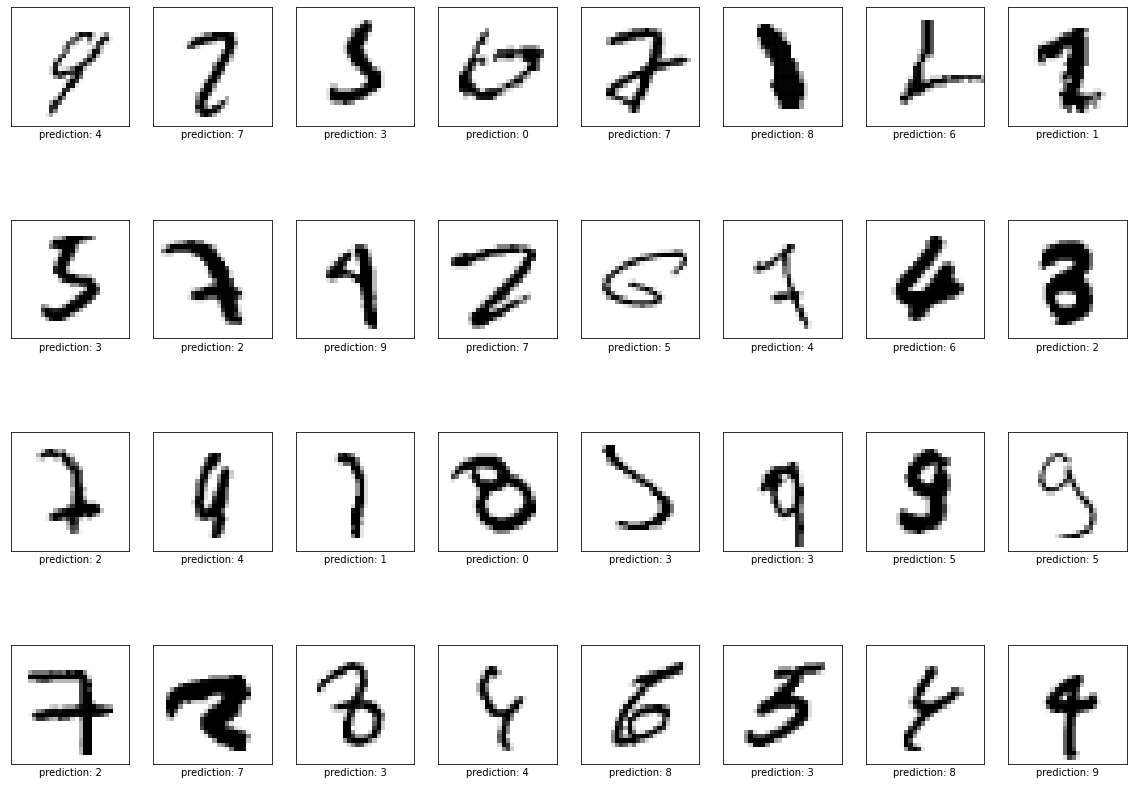

In [ ]:
#  Make predictions with the CNN model
incorrect = []
predicted_classes = model.predict(test_images)

for i,pred in enumerate(predicted_classes):
    if tf.argmax(pred) != tf.argmax(test_Y[i]):
        incorrect.append([i,tf.argmax(pred)])

print(predicted_classes.shape, test_Y.shape)

plt.figure(figsize=(20,15))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(test_images[incorrect[i][0]]), cmap=plt.cm.binary)
    plt.xlabel(f'prediction: {incorrect[i][1]}')

 <div dir='rtl'style="text-align: right;font-family:verdana;">

 **.**

در اینجا اولین تست که عکس عدد 7 است را با احتمال 1 توانست تشخیص دهد(کاملا درست).

true answer is 7
predicted answer is 7
confident for each digit:
0: 0.00000
1: 0.00000
2: 0.00000
3: 0.00000
4: 0.00000
5: 0.00000
6: 0.00000
7: 1.00000
8: 0.00000
9: 0.00000


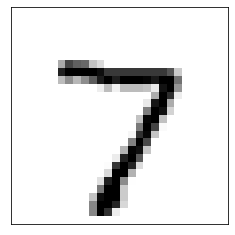

In [ ]:
# Please identify the digit with the highest confidence prediction for the first image in the test dataset
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(test_images[0]), cmap=plt.cm.binary)
print(f"true answer is {test_labels[0]}")
print(f"predicted answer is {tf.argmax(model.predict(test_images)[0])}")
print(f"confident for each digit:")
for i,p in enumerate(model.predict(test_images)[0]):
    print(f"{i}: {p:.5f}")

 <div dir='rtl'style="text-align: right;font-family:verdana;">

**سوال دوم:**
بله بهتر شده ااست زیرا مدل های CNN نسیت به مدل های تماما متصل این مزیت را دارند که خروجی هر لایه تنها به قسمت کوچکی از لایه قبل وابستگی داشته باشد و این ویژگی باعث می شود که به لایه های کمتری نسبت به مدل قبل نیاز داشته باشیم ولی شبکه ما عمیق تر شود و بهتر آموزش ببیند. همچنین مدل های CNN با شیر کرد پارامتر ها می تواند از یک فیلتر در چندین جا استفاده کند و آن خاصیت موردنظرش را در هر جایی از داده با استفاده از فیلتر پیدا کند.


 <div dir='rtl'style="text-align: right;font-family:verdana;">

**سوال سوم:**

مقایسه برای سه optimizer : ADAM  - RMSprop
می بینیم که الگوریتم ADAM بهتر از دو الگوریتم دیگر عمل می کند و در لرنینگ ریت متفاوت تقریبا یکسان است.
در الگوریتم RMSprop در لرنینگ ریت بالا پس از مدتی خراب میشود
همچنین در الگوریتم SGD میدانیم که در رنینگ ریت های پایین عملکرد بدتری دارد.


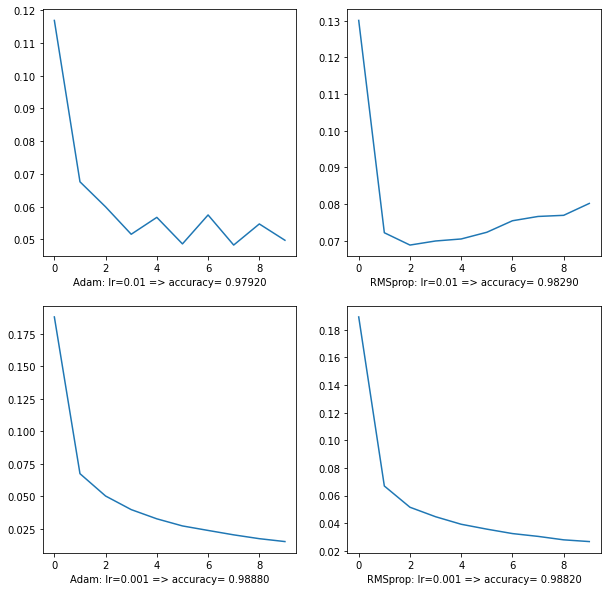

In [ ]:
plt.figure(figsize=(10,10))

lrs = [1e-2,1e-3]

models = []

for i,lr in enumerate(lrs):
    models.append(CNN_model())
    models[-1].compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=lr),metrics=['accuracy'])
    cnn_train = models[-1].fit(train_images,train_Y,epochs=10,verbose=0)
    test = models[-1].evaluate(test_images,test_Y,verbose=0)
    plt.subplot(len(lrs),2,2*i+1)
    plt.plot(cnn_train.history['loss'])
    plt.xlabel(f'Adam: lr={lr} => accuracy= {test[1]:.5f}')

    models.append(CNN_model())
    models[-1].compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr),metrics=['accuracy'])
    cnn_train = models[-1].fit(train_images,train_Y,epochs=10,verbose=0)
    test = models[-1].evaluate(test_images,test_Y,verbose=0)
    plt.subplot(len(lrs),2,2*i+2)
    plt.plot(cnn_train.history['loss'])
    plt.xlabel(f'RMSprop: lr={lr} => accuracy= {test[1]:.5f}')
